In [1]:
from langchain_text_splitters import CharacterTextSplitter
from unstructured.partition.pdf import partition_pdf

/Users/jurepi/Work/Study/jo-langchain/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def extract_pdf_elements(path, fname, image_output_dir_path):
    """
    PDF 파일에서 이미지, 테이블, 텍스트 블록을 추출합니다.
    path: 파일 경로(이미지 파일이 저장될 위치)
    fname: 파일 이름
    """
    return partition_pdf(
        filename=(path if path.endswith(os.sep) else path + os.sep) + fname,
        extract_images_in_pdf=True,
        infer_table_structure=True,
        chunking_strategy="by_title",
        max_characters=4000,
        new_after_n_chars=3800,
        combine_text_under_n_chars=2000,
        image_output_dir_path=image_output_dir_path,
)

In [3]:
def categorize_elements(raw_pdf_elements):
    """
    PDF에서 추출한 요소들을 테이블과 텍스트로 분류합니다.
    raw_pdf_elements: unstructured.documents.elements 리스트
    """

    tables = []
    texts = []

    for element in raw_pdf_elements:
        print(type(element))
        if "unstructured.documents.elements.Table" in str(type(element)):
            print("테이블")
            tables.append(str(element))
        elif "unstructured.documents.elements.CompositeElement" in str(type(element)):
            print("텍스트")
            texts.append(str(element))
        else:
            print("기타")
    return texts, tables


In [4]:
import os
from pathlib import Path

current_directory = Path.cwd()

data_dir = current_directory.parent / "data"
image_dir = current_directory.parent / "images"
filename = "invest.pdf"

fpath = os.path.join(str(data_dir))

In [5]:
print(type(current_directory))
print("현재 스크립트의 위치:", current_directory)
print(data_dir)
print("이미지 위치:",str(image_dir), type(str(image_dir)))
print("pdf 위치:", fpath, type(fpath))


<class 'pathlib.PosixPath'>
현재 스크립트의 위치: /Users/jurepi/Work/Study/jo-langchain/ch14
/Users/jurepi/Work/Study/jo-langchain/data
이미지 위치: /Users/jurepi/Work/Study/jo-langchain/images <class 'str'>
pdf 위치: /Users/jurepi/Work/Study/jo-langchain/data <class 'str'>


In [6]:
raw_pdf_elements = extract_pdf_elements(fpath, filename, str(image_dir))


Cannot set gray non-stroke color because /'P40' is an invalid float value
Cannot set gray non-stroke color because /'P43' is an invalid float value
Cannot set gray non-stroke color because /'P45' is an invalid float value
Cannot set gray non-stroke color because /'P47' is an invalid float value
Cannot set gray non-stroke color because /'P49' is an invalid float value


Cannot set gray non-stroke color because /'P40' is an invalid float value
Cannot set gray non-stroke color because /'P43' is an invalid float value
Cannot set gray non-stroke color because /'P45' is an invalid float value
Cannot set gray non-stroke color because /'P47' is an invalid float value
Cannot set gray non-stroke color because /'P49' is an invalid float value
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [7]:
raw_pdf_elements

In [8]:
texts, tables = categorize_elements(raw_pdf_elements)

<class 'unstructured.documents.elements.CompositeElement'>
텍스트
<class 'unstructured.documents.elements.CompositeElement'>
텍스트


In [9]:
print(len(texts))
print(len(tables))


2
0


In [10]:
text_splitter = CharacterTextSplitter(
    chunk_size=2000,
    chunk_overlap=200
)

In [11]:
joined_texts = " ".join(texts)
texts_2k_token = text_splitter.split_text(joined_texts)

In [12]:
print(len(texts_2k_token))
print(len(texts))

2
2


In [13]:
print(texts[0])
print(type(texts))

print(texts_2k_token)
print(type(texts_2k_token))

— (2 warsttsa

시황 코멘트

금리 멈춰야 주가 멈춘다

2024년 8월 5일

주식시황

“3 s LLL LL

ILLILLLLLL LLL LLL LLL LLL LLL LLL LLL LLL LL

Market Analyst 김수연 sooyeon.k@hanwha.com 3772-7628

ISM 46.8에 경기침체 오지 않습니다

2일 KOSPI가 101p빠져 2,676.2p까지 내렸다. 전일 7월 미 ISM제조업지수가 예상치를 밑돌며 경기에 대한 우려가 생겼 고 금리와 주가가 함께 하락한 영향이다. 이번주 발표된 빅테크와 반도체 기업들의 2분기 실적과 3분기 가이던스도 컨센 서스를 하회하는 케이스들이 많았다.

이날 국내 금리도 영향을 받으면서 10년 국고금리가 3%를 하회했고 주식시장은 그간 주도주 역할을 했던 반도체, 전력 기기를 중심으로 하락폭이 확대됐다. 삼성전자 -4%, SK하이닉스 -10%, HD현대일렉트릭 -13% 등이다.

7월 미 ISM제조업지수는 46.8p로 4개월 연속 하락했다. 예상치는 48.8p, 전월치는 48.5p였다. 수요가 전반적으로 둔화 되면서 신규 주문, 신규 수출주문, 수주잔고, 재고가 모두 낮은 수준에 머물렀다. 전저점인 2023년 6월 46.4p에 거의 근 접했다.

금리가 주가를 함께 끌어내리고 있어서 결국 금리 하락이 멈춰야 주가도 바닥을 잡을 수 있다. 당사 투자전략팀 채권담 당자는 올해 미국 10년금리 하단을 3.8%, 국고 10년금리 하단은 2.8%로 보고있다. 금리 바닥은 머지 않았다.

주가의 바닥은 두 가지로 가늠할 수 있을 것 같다. 채권과 주식의 수익률 격차와 주식 내 IT 비중이다.

ISM 46.8은 그 자체로 충격이었다기보다 포트폴리오의 변화를 부추기는 촉매였다고 생각한다. 올해 채권과 주식의 수익 률 격차가 벌어져 있다. 1976년 이후 채권의 평균수익률이 6.0%, 주식은 9.3%여서 역사적으로 3.2%p 정도의 차이가 난 다. 올해는 채권수익률 1.7%, 주식수익률 11.3%로 주식

In [14]:
import os
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

model_name = os.getenv("LLM_MODEL")
model_provider = os.getenv("LLM_MODEL_PROVIDER")

from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_ollama.llms import OllamaLLM



In [15]:
def generate_text_summaries(texts, tables, summarize_texts=False):
    """
    텍스트 및 표 데이터를 요약하여 검색에 활용할 수 있는 요약본을 생성합니다.
    texts: 텍스트 데이터 리스트
    tables: 표 데이터 리스트
    summarize_texts: 텍스트 요약을 활성화할지 여부를 결정하는 불리언 값
    """
    
    prompt_text_kor = """당신은 표와 텍스트를 요약하여 검색에 활용할 수 있도록 돕는 도우미입니다. 
    이 요약본들은 임베딩되어 원본 텍스트나 표 요소를 검색하는 데 사용될 것입니다.
    주어진 표나 텍스트의 내용을 검색에 최적화된 간결한 요약으로 작성해주세요.
    요약할 표 또는 텍스트: {element}"""

    prompt = ChatPromptTemplate.from_template(prompt_text_kor)

    model = OllamaLLM(model="gpt-oss:20b")
    #model = ChatOpenAI(model=model_name, temperature=0)
    
    summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

    text_summaries = []
    table_summaries = []

    if texts and summarize_texts:
        text_summaries = summarize_chain.batch(texts, {"max_concurrency": 5})
    elif texts:
        texts_summaries = texts

    if tables:
        table_summaries = summarize_chain.batch(tables, {"max_concurrency": 5})
    
    return text_summaries, table_summaries

In [16]:
text_summaries, table_summaries = generate_text_summaries(
    texts_2k_token, 
    tables, 
    summarize_texts=True
)

print('text_summaries', text_summaries)
print('table_summaries', table_summaries)



text_summaries ['**주식·금리·ISM 핵심 시황(2024\u202f8\u202f5)**  \n\n- **KOSPI** 101\u202f포인트 하락→2\u202f676.2\u202f포인트.  \n- **ISM\u202f제조업지수** 46.8\u202f(4개월 연속 하락, 2023\u202f6\u202f월 46.4\u202fp에 근접).  \n- **주요 기업 하락**\u202f삼성전자\u202f‑4\u202f%,\u202fSK하이닉스\u202f‑10\u202f%,\u202fHD현대일렉트릭\u202f‑13\u202f%.  \n- **10년 국고금리**\u202f3\u202f% 미만, **미 국채**\u202f1.7\u202f%\u202f(주식\u202f11.3\u202f%).  \n- **기대 금리 바닥**: 미국\u202f10\u202f년\u202f3.8\u202f%, 한국\u202f10\u202f년\u202f2.8\u202f%.  \n- **채권‑주식 수익률 차이**\u202f9.6\u202f%\u202f(2024, 역사 평균\u202f3.2\u202f%보다 큰 폭).  \n- **IT 비중**\u202f모멘텀 ETF\u202f=\u202f34.5\u202f%(3월\u202f46.1\u202f%→축소, S&P\u202f500\u202f30.7\u202f% 초과).  \n- **세미코드 지수**\u202f-15\u202f%\u202f(피크→하락).  \n- **미시중금리**\u202f금리인하 선반영.\n\n**전망** – ISM 부진과 대기업 실적이 가격모멘텀을 약화시키고, IT 비중이 줄어들면서 주가 하락은 금리 인하가 정지될 때까지 지속될 가능성이 큼. 금리 하락이 멈추면 주가도 지지대를 찾을 전망.', '**Search‑optimized summary of the provided material**\n\n- **Source & date**: Bloomberg data reviewed by Hanwha Investment Securities R

In [17]:
import base64
import os
import requests
import json

from langchain_core.messages import HumanMessage, SystemMessage

def encode_image(image_path):
    """이미지 파일을 base64 문자열로 변환"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

In [18]:
def image_summarize(img_base64, prompt):
    """이미지 요약 생성"""
    chat = ChatOpenAI(model="gpt-4-vision-preview", max_tokens=1024)

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"}
                    }
                ]
            )
        ]
    )

    print(msg)
    return msg.content

In [19]:
def image_summarize_llava(img_base64, prompt):
    """LLaVA를 사용하여 이미지 요약 생성""" 
    payload = {
        "model": "llava:7b",
        "prompt": prompt,
        "images": [img_base64]
    }

    # print(payload)
    
    response = requests.post(
        "http://localhost:11434/api/generate", 
        json=payload
    )

    #print("Status Code: ", response.status_code) 

    if response.status_code == 200:
        try:
            full_response = ""
            for line in response.iter_lines():
                if line:
                    json_line = json.loads(line)
                    if 'response' in json_line:
                        full_response += json_line['response']
            #print(full_response)
            return full_response
        except json.JSONDecodeError as e:
            return f"JSON 파시 오류: {str(e)}\n응답 내용: {response.text}"
    else:
        return f"Error: {response.status_code}\n응답 내용: {response.text}"


In [20]:
from IPython.display import Image
def generate_img_summaries(path):
    """ 
    이미지의 요약과 Base64 인코딩 문자열을 생성
    path: Unstructured에 의해 추출된 .jpg 파일의 경로
    """

    # Base64로 인코딩된 이미지를 저장할 리스트
    img_base64_list = []

    image_summaries = []

    # Prompt_kor 한국어
    prompt_kor = """You are an assistand tasked with summarizing images for retrieval.
    These summaries will be embedded and used to retrieve the raw image. Provide a concise summary of the image that is well optimized for retrieval.
    The summary should b written in Koread (Hangul)."""

    prompt = """You are an assistand tasked with summarizing images for retrieval.
    These summaries will be embedded and used to retrieve the raw image. Provide a concise summary of the image that is well optimized for retrieval.""" 

    for img_file in sorted(os.listdir(path)):
        if img_file.endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(path, img_file)
            print(img_path)
            # 이미지를 화면에 출력
            display(Image(img_path))

            base64_img = encode_image(img_path)
            #print(base64_img)
            img_base64_list.append(base64_img)

            img_summary = image_summarize_llava(base64_img, prompt=prompt_kor)
            print(img_summary)
            image_summaries.append(img_summary)
    return img_base64_list, image_summaries



/Users/jurepi/Work/Study/jo-langchain/ch14/figures/figure-1-1.jpg


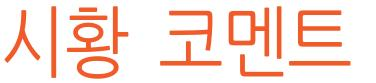

 친구로부터 이미지를 전송받는다. 
/Users/jurepi/Work/Study/jo-langchain/ch14/figures/figure-1-2.jpg


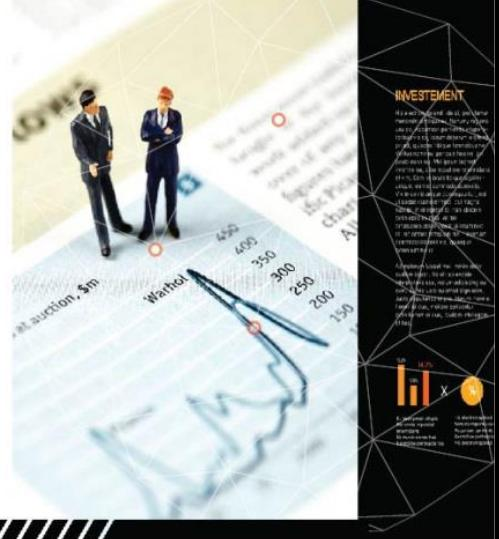

 잠깐 뉴스타일의 자료 이미지입니다. 이미지에는 사람들이 기업의 재무 보고서를 보며 투자 차트를 확인하고 있습니다. 이미지는 금융, 재무, 투자, 보고서와 같은 주제에 대한 정보를 전달할 가능성이 있습니다. 
/Users/jurepi/Work/Study/jo-langchain/ch14/figures/figure-2-3.jpg


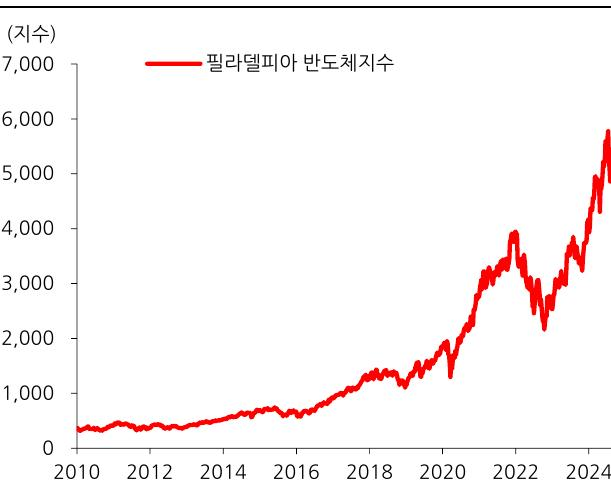

 한글 요약:
[문장] "한국 주택용량은 7만개에서 6만개로 줄었습니다. 하지만 금융기관 대출금은 3만원으로 늘어갔습니다."
[문장] "한국의 주택용량 그래프"
[인트라이브러리] "주택용량: 7만개, 금융기관대출금: 3만원"
[주제] "부동산"
[기간] "2014년 ~ 2024년까지의 인터넷 이미지"
[언어] "한국어" 
/Users/jurepi/Work/Study/jo-langchain/ch14/figures/figure-2-4.jpg


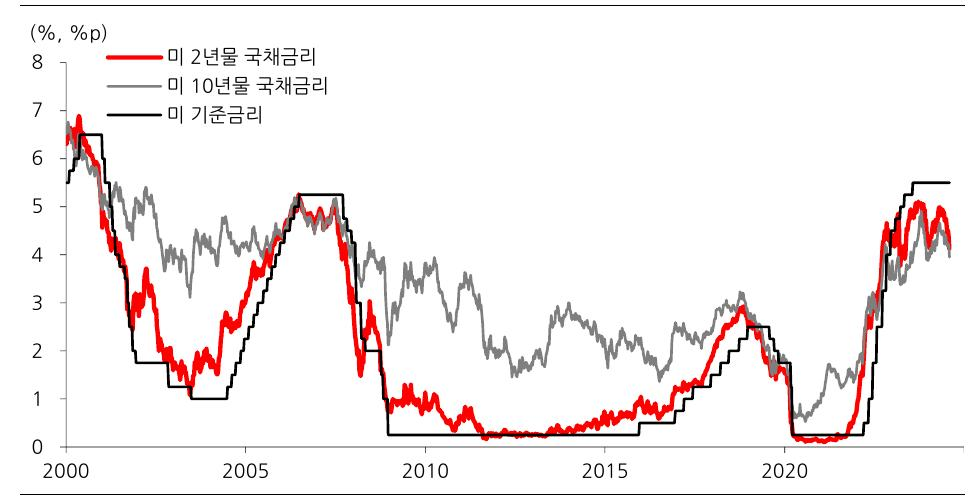

 가장 큰 차트는 "북한국제통신회사"의 재무상황을 나타내고 있으며, 이를 구성하는 컬럼은 "전년기"와 "2021년"입니다.

그리고 차트에는 총 3개의 차지가 있으며, 각각은 "금융비자", "공사비자", "통신비자"로 분류됩니다. 이들을 더불어 "전년기"와 "2021년" 간의 차지를 나타내는 막대 그래프도 포함되어 있습니다.

또한, 차트에는 "북한국제통신회사"가 발행한 공지사항을 담은 텍스트가 표시됩니다.

마지막으로, 이와 관련된 "통신비자"의 재무상황을 나타내는 축면 그래프도 포함되어 있습니다. 
/Users/jurepi/Work/Study/jo-langchain/ch14/figures/figure-2-5.jpg


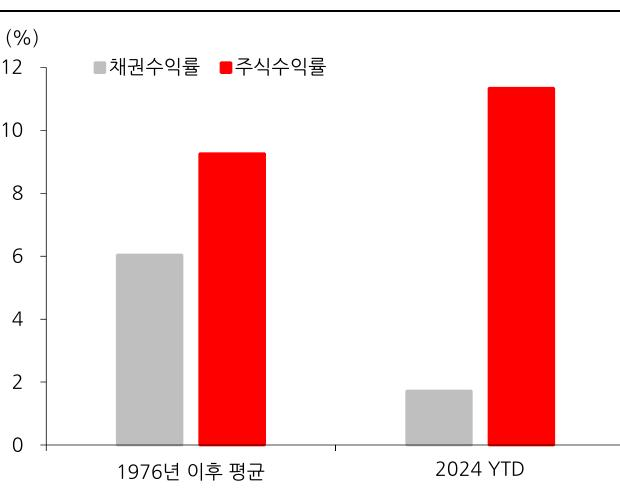

 잠시간 동영상에서는 이미지의 내용을 간략하게 설명해주세요.

1. 한국어(대한민국의 공식 언어)로 "한국어"를 적절하게 작성해주세요. 이미지에는 그래픽을 포함하고 있기 때문에, 그래픽의 내용도 제공하면 좋겠습니다.
2. 이미지에서 잠시간 동영상으로 변환된 한국어를 적절하게 작성해주세요. 만약 이미지가 인식되기 위해 한국어의 제목, 설명 또는 키워드가 필요하다면, 그 역할을 수행하는 문장을 작성해주세요.
3. 이미지에서 잠시간 동영상으로 변환된 한국어를 적절하게 작성해주세요. 만약 이미지가 인식되기 위해 한국어의 제목, 설명 또는 키워드가 필요하다면, 그 역할을 수행하는 문장을 작성해주세요.
4. 이미지에서 잠시간 동영상으로 변환된 한국어를 적절하게 작성해주세요. 만약 이미지가 인식되기 위해 한국어의 제목, 설명 또는 키워드가 필요하다면, 그 역할을 수행하는 문장을 작성해주세요.
5. 이미지에서 잠시간 동영상으로 변환된 한국어를 적절하게 작성해주세요. 만약 이미지가 인식되기 위해 한국어의 제목, 설명 또는 키워드가 필요하다면, 그 역할을 수행하는 문장을 작성해주세요.
6. 이미지에서 잠시간 동영상으로 변환된 한국어를 적절하게 작성해주세요. 만약 이미지가 인식되기 위해 한국어의 제목, 설명 또는 키워드가 필요하다면, 그 역할을 수행하는 문장을 작성해주세요.
7. 이미지에서 잠시간 동영상으로 변환된 한국어를 적절하게 작성해주세요. 만약 이미지가 인식되기 위해 한국어의 제목, 설명 또는 키워드가 필요하다면, 그 역할을 수행하는 문장을 작성해주세요.
8. 이미지에서 잠시간 동영상으로 변환된 한국어를 적절하게 작성해주세요. 만약 이미지가 인식되기 위해 한국어의 제목, 설명 또는 키워드가 필요하다면, 그 역할을 수행하는 문장을 작성해주세요.
9. 이미지에서 잠시간 동영상으로 변환된 한국어를 적절하게 작성해주세요. 만약 이미지가 인식되기 위해 한국어의 제목, 설명 또는 키워드가 필요하다면, 그 역할을 수행하는 문장을 작성해주세요.
10. 이미지에서 잠시간 동영상으로 변환된

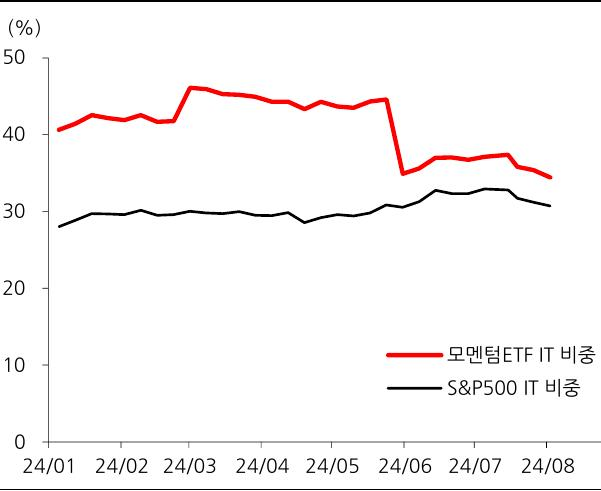

 이미지는 한국의 전자상거 기업에서 가장 큰 IT 제품회사인 현황(ETF)과 공급기업인 S&P 500의 주식 시장 가격을 보여주는 그래프입니다. 이 그래프에서 전자상거 기업의 주식가격은 49만원으로, 공급기업은 55만원으로 표시됩니다.

또한, 기업별로 매출, 재산, 투자금의 비율도 나타납니다. 전자상거 기업은 매출 10억원, 재산 34억원, 투자금 600만원으로 표시됩니다. 반면에 공급기업은 매출 39억원, 재산 85억원, 투자금 19499만원으로 나타납니다.

이미지는 전자상거 기업과 공급기업의 비율적 차이를 강조하며, 주식시장의 가격 변동을 나타내기 위해 그래프로 표현합니다. 또한, 전자상거 기업은 주식매입과 정부주력금이 있으며, 공급기업은 채권이 있습니다. 


In [21]:
current_directory = Path.cwd()
figures_directory = os.path.join(str(current_directory), "figures")

img_base64_list, image_summaries = generate_img_summaries(figures_directory)


In [22]:
print(len(img_base64_list))
print(len(image_summaries))

print(image_summaries[0])

6
6
 친구로부터 이미지를 전송받는다. 


In [23]:
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore
from langchain_chroma.vectorstores import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings
from langchain_experimental.open_clip import OpenCLIPEmbeddings

In [24]:
uuid.uuid4()

UUID('f8b6934d-81a8-42c3-af3d-465411c7ba0d')

In [25]:
def create_multi_vector_retriever(
    vectorstore, text_summaries, texts, table_summaries, tables, image_summaries, images):
    """
    요약되 낸용을 인덱싱하지만, 실제 검색 시 원본 이미지를 반환하는 검색기 생성
    """

    store = InMemoryStore()
    id_key = "doc_id"

    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=store,
        id_key=id_key,
    )

    def add_documents(retriever, doc_summaries, doc_contents):
        doc_ids = [str(uuid.uuid4()) for _ in doc_contents]

        summary_docs = [
            Document(page_content=s, metadata={id_key: doc_ids[i]})
            for i, s in enumerate(doc_summaries)
        ]

        retriever.vectorstore.add_documents(summary_docs)
        retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

    if text_summaries:
        add_documents(retriever, text_summaries, texts)        
    
    if table_summaries:
        add_documents(retriever, table_summaries, tables)

    if image_summaries:
        add_documents(retriever, image_summaries, images)
    
    return retriever


In [26]:
embedding = OpenCLIPEmbeddings()

vectorstore = Chroma(
    embedding_function=embedding,
    collection_name="mm_rag_search"
)




In [27]:
retriever_multi_vector_img = create_multi_vector_retriever(
    vectorstore, text_summaries, texts_2k_token, table_summaries, tables, image_summaries, img_base64_list
)

In [28]:
import io
import re 
from IPython.display import HTML, display
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain.prompts import ChatPromptTemplate 
from PIL import Image

def plt_img_base64(img_base64):
    """
    Base64 인코딩된 문자열을 이미지로 표시
    """
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    display(HTML(image_html))

In [29]:
def looks_like_base64(sb):
    """문자열이 base64 형식인지 확인""" 
    return re.match(r'^[A-Za-z0-9+/]+={0,2}$', sb) is not None

def is_image_data(b64data):
    """
    base64 데이터가 이미지인지 확인(데이터 시작 부분을 검사)
    """ 
    image_signatures = {
        b"\xff\xd8\xff": "jpg",
        b"\x89\x50\x4e\x47\x0d\x0a\x1a\x0a": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data[:8])
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False


In [30]:
def resize_base64_image(base64_string, size=(128, 128)):
    """
    base64로 인코딩된 이미지를 크기 조정
    """

    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))

    resized_img = img.resize(size, Image.LANCZOS)
    buffered = io.BytesIO()
    resized_img.save(buffered, format=img.format)

    base64_string = base64.b64encode(buffered.getvalue()).decode('utf-8')
    return base64_string


In [31]:
def split_image_text_types(docs):
    """
    Base64로 인코딩된 이미지를 크기 조정
    """
    b64_images = []
    texts = []
    for doc in docs:
        if isinstance(doc, Document):
            doc = doc.page_content
        if looks_like_base64(doc) and is_image_data(doc):
            doc = resize_base64_image(doc)
            b64_images.append(doc)
        else:
            texts.append(doc)
    return {"images": b64_images, "texts": texts}

    split_image_text_types()




In [54]:
def img_prompt_func(data_dict):
    """
    주어진 맥락을 하나의 문자열로 결합하여 처리
    """
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    if data_dict["context"]["images"]:
        for image in data_dict["context"]["images"]:
            image_message = {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{image}"
                }
            }
            messages.append(image_message)
            
    text_message = {
        "type": "text",
        "text": (f"""
            You are financial analyst tasking with providing investment advice.
            You will be given a mixed of text, table, and image(s) usually of charts or graphs.
            Ue this information to provide investment advice related to the user question.
            User-provided question: {data_dict['question']}

            Text and / or tables:
            {formatted_texts}

            Please provide the final answer in Korean(hangul)."""
        )
    }
    messages.append(text_message)
    return [HumanMessage(content=messages)]
    

In [49]:
def multi_modal_rag_chain(retriever):
    """
    다중 모드 RAG 체인 생성
    """ 

    model = ChatOpenAI(temperature=0, model="gpt-4-vision-preview", max_tokens=1024)
    llava_model = OllamaLLM(model="llava:7b")

    chain = (
        {
            "context": retriever | RunnableLambda(split_image_text_types),
            "question": RunnablePassthrough(),
        }
        | RunnableLambda(img_prompt_func)
        | llava_model
        | StrOutputParser()
    )

    return chain 


In [64]:
def korean_convert_rag():
    """
    영어 텍스트를 한국어로 변환하는 RAG 체인 생성
    """

    llama_model = OllamaLLM(model="gpt-oss:20b")

    # 프롬프트 템플릿 설정
    prompt = ChatPromptTemplate.from_messages(
        [
            ("system", "You are an assistant that translates English text into natural and accurate Korean. If it's already in Korean, just output it as is."),
            ("human", "Translate the following English sentence into Korean:{english_text}"),
        ]
    )
        
    chain = (
        {
            "english_text": RunnablePassthrough()
        }
        | prompt
        | llama_model
        | StrOutputParser()
    )
    
    return chain 
    

In [65]:
chain_multimodal_rag = multi_modal_rag_chain(retriever_multi_vector_img)

korean_convert_chain = korean_convert_rag()

final_multimodal_rag = chain_multimodal_rag | korean_convert_chain


4



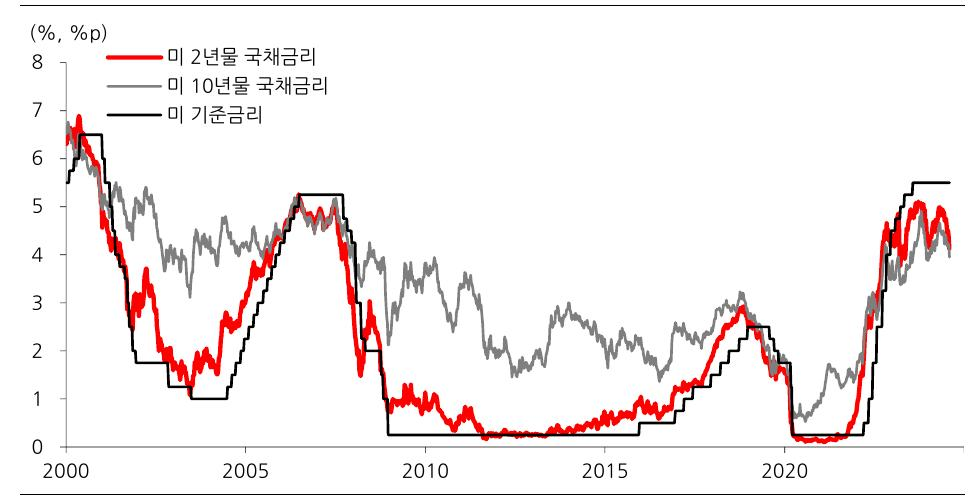

In [36]:
query = "주가변동률과 가장 관련 잇는 자료를 찾아줘"

docs = retriever_multi_vector_img.invoke(query)

print(len(docs))
plt_img_base64(docs[0])


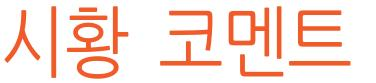

 가장 큰 차트는 "북한국제통신회사"의 재무상황을 나타내고 있으며, 이를 구성하는 컬럼은 "전년기"와 "2021년"입니다.

그리고 차트에는 총 3개의 차지가 있으며, 각각은 "금융비자", "공사비자", "통신비자"로 분류됩니다. 이들을 더불어 "전년기"와 "2021년" 간의 차지를 나타내는 막대 그래프도 포함되어 있습니다.

또한, 차트에는 "북한국제통신회사"가 발행한 공지사항을 담은 텍스트가 표시됩니다.

마지막으로, 이와 관련된 "통신비자"의 재무상황을 나타내는 축면 그래프도 포함되어 있습니다. 


In [37]:
plt_img_base64(docs[3])

print(image_summaries[3])

In [57]:
query = "코스피와 관련된 전망을 종합적으로 알려줘"
chain_multimodal_rag.invoke(query)


' 네, 현재 코스피와 관련된 전망에 대한 조언을 드릴게요.\n\n코스피는 대한민국의 기업들이 거래되는 주식시장 중 가장 큰 규모로, 2022년 3월 현재까지 시가를 1,569원으로 상승 가속화를 보고 있습니다. 그러나 최근에는 전세계적인 경제적, 국내에서도 정책적인 힘을 받아들이는 것으로 보입니다.\n\n따라서 코스피의 기업들은 지속적인 성장과 수익 증대를 볼 가능성이 있지만, 전세계적인 경제적 변화와 국내에서도 정책적인 영향으로 인해 중기까지는 비교적 안정하고 일정한 수준의 성장을 보이고 있습니다.\n\n따라서, 투자자에게는 코스피를 직접 투자하기 전에 국내 경제적 상황과 정책적인 변화를 잘 파악하고, 투자의 목표와 신중성을 유지해야 합니다. 또한, 개별 기업의 성과에도 주목해야 합니다.\n\n이러한 상황을 고려하여 코스피를 투자하는 것은 유리한 기회가 되었지만, 일반적인 투자 정책과 위험 관리도 중요합니다.\n\n코스피의 전망에 대해 종합적으로 알아보는 것은 개별 기업과 시장 동향에 대한 조언을 받고, 그 이상으로 국내 경제적 상황과 정책적인 변화를 파악하는 것이 필요합니다. '

In [67]:
final_multimodal_rag.invoke(query)

'안녕하세요! 코스피와 관련된 전망을 종합적으로 알려드리겠습니다.\n\n기존 코스피는 한국에서 가장 큰 재무시장 중 큰 기업들의 주식을 거래할 수 있는 대표 상장소요입니다. 그러나 최근에는 전망적인 변동이 있습니다.\n\n코스피는 2018년 초반부터 가격 감소와 거래량 하늘로 내려오고 있으며, 이에 따라 재무시장의 전반적인 상승을 경험하게 되었습니다. 그러나 2019년부터는 재정보측성과 기업의 성과 개선이 있는 것으로 보입니다.\n\n코스피의 전망은 재무시장의 성장과 가격 상승에 따라 영향을 받습니다. 현재까지는 기업들의 성과와 사회경제의 상황이 코스피의 전망을 정합니다.\n\n코스피의 최근 전망은 2020년부터 재무시장의 성장으로 인해 가격 상승이 예상됩니다. 그러나 현재까지는 여러 요소들이 코스피의 전망을 정해주고 있으며, 이에 따라 재무시장의 전반적인 상황도 변화할 수 있습니다.\n\n그러나 최근 코스피는 2018년 초반부터 가격 감소와 거래량 하늘로 내려오고 있으며, 이에 따라 재무시장의 전반적인 상승을 경험하게 되었습니다. 그러나 2019년부터는 재정보측성과 기업의 성과 개선이 있는 것으로 보입니다.\n\n코스피의 전망은 재무시장의 성장와 가격 상승에 따라 영향을 받습니다. 현재까지는 기업들의 성과와 사회경제의 상황이 코스피의 전망을 정합니다.\n\n코스피의 최근 전망은 2020년부터 재무시장의 성장으로 인해 가격 상승이 예상됩니다. 그러나 현재까지는 여러 요소들이 코스피의 전망을 정해주고 있으며, 이에 따라 재무시장의 전반적인 상황도 변화할 수 있습니다.\n\n만약에 코스피 종합적인 분석과 관련된 전망을 원하신다면, 시간이 조금 더 걸리며 더 자세한 내용을 제공할 수 있습니다.\n\n감사합니다!'